# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ricky Saputra
- **Email:** rickysptra24@gmail.com
- **ID Dicoding:** rickysptr24

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh musim dan situasi cuaca terhadap jumlah penggunaan sepeda?
- Pertanyaan 2 : Bagaimana kecepatan angin memengaruhi tingkat penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
day_df = pd.read_csv('day.csv')

In [31]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
hour_df = pd.read_csv('hour.csv')

In [33]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pengumpulan data day.csv
- Pengumpulan data hour.csv

### Assessing Data

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [35]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [38]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [39]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [40]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day.csv : Terdapat Kesalahan tipe data untuk kolom dteday
- hour.csv : Terdapat Kesalahan tipe data untuk kolom dteday

### Cleaning Data

In [41]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [43]:
dteday_columns = ["dteday"]

for column in dteday_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- day.csv : pada kolom dteday sudah melakukan perubahan tipe data object menjadi datetime.
- hour.csv : pada kolom dteday sudah melakukan perubahan tipe data object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [50]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
58,59,2011-02-28,1,0,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686,81,1365,1446
463,464,2012-04-08,2,1,4,0,0,0,1,0.500000,0.492425,0.275833,0.232596,2230,2939,5169
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
709,710,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,329,4841,5170


In [53]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_label'] = day_df['season'].map(season_mapping)

In [54]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
562,563,2012-07-16,3,1,7,0,1,1,1,0.763333,0.724125,0.645000,0.164187,1088,5742,6830,Summer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter
276,277,2011-10-04,4,0,10,0,2,1,1,0.484167,0.472858,0.710000,0.205854,486,3970,4456,Fall
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436,Spring
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786,Fall


In [56]:
season_counts = day_df.groupby('season_label')['cnt'].sum().reset_index()

In [57]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
663,664,2012-10-25,4,1,10,0,4,1,2,0.550000,0.529688,0.800417,0.124375,875,6484,7359,Fall
82,83,2011-03-24,2,0,3,0,4,1,2,0.285000,0.270833,0.805833,0.243787,166,1699,1865,Spring
616,617,2012-09-08,3,1,9,0,6,0,2,0.659167,0.611121,0.799167,0.281104,1557,4419,5976,Summer
460,461,2012-04-05,2,1,4,0,4,1,1,0.435000,0.431163,0.374167,0.219529,1192,5265,6457,Spring
656,657,2012-10-18,4,1,10,0,4,1,2,0.522500,0.512625,0.728333,0.236937,1008,6501,7509,Fall


In [58]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_mapping)

In [59]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label
413,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318,Winter,Clear
267,268,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010,Fall,Mist
128,129,2011-05-09,2,0,5,0,1,1,1,0.532500,0.525246,0.588750,0.176000,664,3698,4362,Spring,Clear
243,244,2011-09-01,3,0,9,0,4,1,1,0.655000,0.614921,0.639167,0.141796,783,4332,5115,Summer,Clear
393,394,2012-01-29,1,1,1,0,0,0,1,0.282500,0.272721,0.311250,0.240050,558,2685,3243,Winter,Clear


In [60]:
weather_counts = day_df.groupby('weather_label')['cnt'].sum().reset_index()

In [61]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label
522,523,2012-06-06,2,1,6,0,3,1,1,0.554167,0.542292,0.611250,0.077125,1027,6028,7055,Spring,Clear
529,530,2012-06-13,2,1,6,0,3,1,1,0.655833,0.611117,0.582083,0.343279,1173,6248,7421,Spring,Clear
221,222,2011-08-10,3,0,8,0,3,1,1,0.766667,0.684983,0.424167,0.200258,884,3896,4780,Summer,Clear
370,371,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098,Winter,Clear
567,568,2012-07-21,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.213300,1264,3195,4459,Summer,Light Snow/Rain


In [62]:
day_df['windspeed'].describe()

,windspeed
count,731.000000
mean,0.190486
std,0.077498
min,0.022392
25%,0.134950
50%,0.180975
75%,0.233214
max,0.507463


In [63]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4777,4778,2011-07-22,3,0,7,23,0,5,1,1,0.80,0.7879,0.63,0.1940,19,84,103
17101,17102,2012-12-20,4,1,12,8,0,4,1,2,0.30,0.3333,0.70,0.0000,14,585,599
6523,6524,2011-10-04,4,0,10,9,0,2,1,1,0.46,0.4545,0.67,0.2537,19,168,187
5299,5300,2011-08-13,3,0,8,17,0,6,0,2,0.72,0.6970,0.74,0.2537,97,172,269
3192,3193,2011-05-17,2,0,5,22,0,2,1,2,0.54,0.5152,0.88,0.2836,12,86,98


In [64]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_df['season_label'] = hour_df['season'].map(season_mapping)

In [65]:
season_counts = hour_df.groupby('season_label')['cnt'].sum().reset_index()

In [66]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
4590,4591,2011-07-15,3,0,7,4,0,5,1,1,0.60,0.5909,0.73,0.1642,2,8,10,Summer
9546,9547,2012-02-07,1,1,2,17,0,2,1,1,0.44,0.4394,0.35,0.1940,15,494,509,Winter
1270,1271,2011-02-26,1,0,2,2,0,6,0,1,0.22,0.1970,0.60,0.3582,3,9,12,Winter
11066,11067,2012-04-11,2,1,4,7,0,3,1,1,0.28,0.2879,0.52,0.1343,18,303,321,Spring
6517,6518,2011-10-04,4,0,10,3,0,2,1,1,0.40,0.4091,0.82,0.1045,3,3,6,Fall


In [67]:
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
hour_df['weather_label'] = hour_df['weathersit'].map(weather_mapping)

In [68]:
weather_counts = hour_df.groupby('weather_label')['cnt'].sum().reset_index()

In [69]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label
2709,2710,2011-04-27,2,0,4,19,0,3,1,1,0.62,0.5909,0.78,0.2836,40,220,260,Spring,Clear
1382,1383,2011-03-02,1,0,3,21,0,3,1,1,0.34,0.2879,0.29,0.4627,3,68,71,Winter,Clear
3201,3202,2011-05-18,2,0,5,7,0,3,1,1,0.54,0.5152,0.88,0.1940,14,260,274,Spring,Clear
6949,6950,2011-10-22,4,0,10,4,0,6,0,1,0.38,0.3939,0.66,0.0896,4,4,8,Fall,Clear
8675,8676,2012-01-02,1,1,1,7,1,1,0,1,0.24,0.2121,0.32,0.3881,0,16,16,Winter,Clear


In [71]:
pivot_avg = hour_df.pivot_table(
    values='cnt',
    index='season',
    columns='weathersit',
    aggfunc='mean'
)

In [75]:
pivot_avg

weathersit,1,2,3,4
season,,,,
1,122.055535,103.074689,58.650407,74.333333
2,232.410983,181.261364,115.179803,NaN
3,244.494207,224.848997,171.955390,NaN
4,209.463779,201.483974,116.453333,NaN


In [76]:
pivot_sum = hour_df.pivot_table(
    values='cnt',
    index='season',
    columns='weathersit',
    aggfunc='sum'
)

In [77]:
pivot_sum

weathersit,1,2,3,4
season,,,,
1,325278.0,124205.0,21642.0,223.0
2,664463.0,207363.0,46763.0,NaN
3,801941.0,212932.0,46256.0,NaN
4,546491.0,251452.0,43670.0,NaN


**Insight:**
- pada file day.csv dan hour.csv melakukan season_mapping dan weather_mapping digunakan untuk mengganti nilai numerik di kolom season dan weathersit menjadi label yang lebih mudah dipahami.
- pada file hour.csv :
  - Pivot table pertama menunjukkan rata-rata penggunaan sepeda (cnt) untuk setiap kombinasi season dan weathersit.
  - Pivot table kedua menampilkan total penggunaan sepeda untuk kombinasi yang sama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan situasi cuaca terhadap jumlah penggunaan sepeda?

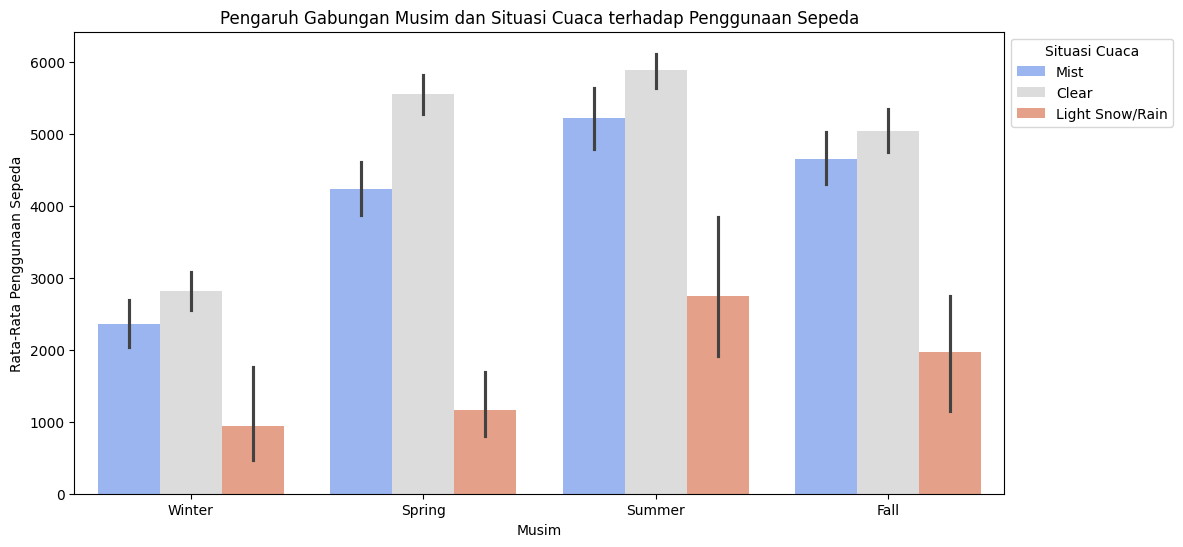

In [91]:
# Membuat Clustered Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='season_label',
    y='cnt',
    hue='weather_label',
    data=day_df,
    palette='coolwarm'
)
plt.title('Pengaruh Gabungan Musim dan Situasi Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Penggunaan Sepeda')
plt.legend(title='Situasi Cuaca', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Pertanyaan 2: Bagaimana kecepatan angin memengaruhi tingkat penggunaan sepeda?

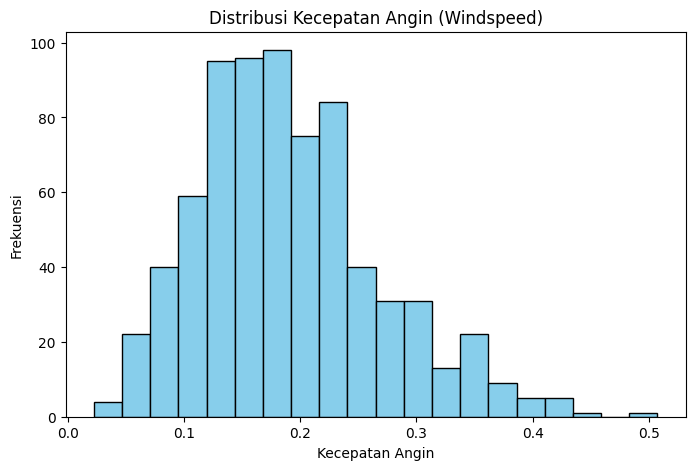

In [92]:
# Membuat histogram untuk kecepatan angin
plt.figure(figsize=(8, 5))
plt.hist(day_df['windspeed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kecepatan Angin (Windspeed)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Frekuensi')
plt.show()

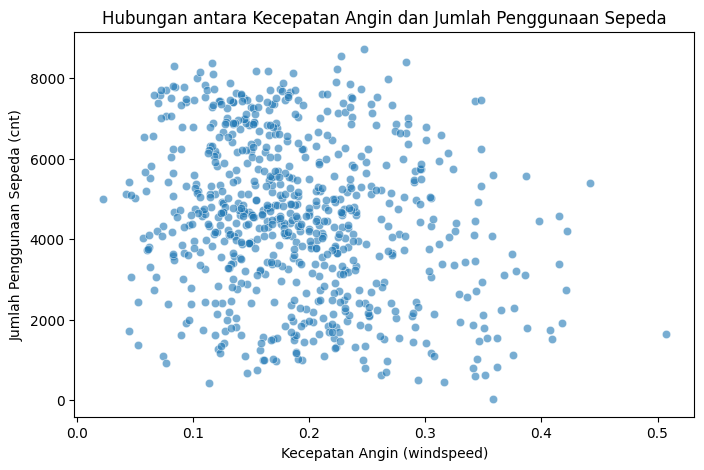

In [93]:
# Scatter plot antara kecepatan angin dan jumlah penggunaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=day_df, alpha=0.6)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penggunaan Sepeda')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

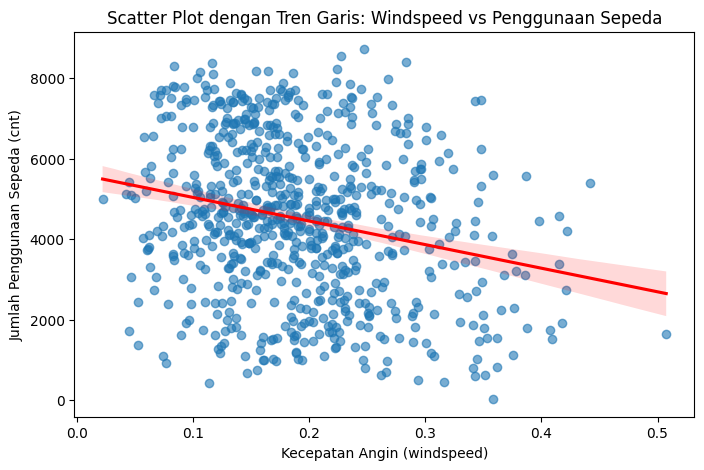

In [95]:
# Scatter plot dengan garis regresi
plt.figure(figsize=(8, 5))
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot dengan Tren Garis: Windspeed vs Penggunaan Sepeda')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Penggunaan Sepeda (cnt)')
plt.show()

In [97]:
# Membuat kategori untuk kecepatan angin (rendah, sedang, tinggi)
bins = [0, 10, 20, 30]
labels = ['Low', 'Medium', 'High']
day_df['windspeed_category'] = pd.cut(day_df['windspeed'], bins=bins, labels=labels)

<ipython-input-98-6d6b1f52680a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='windspeed_category', y='cnt', data=day_df, palette='pastel')


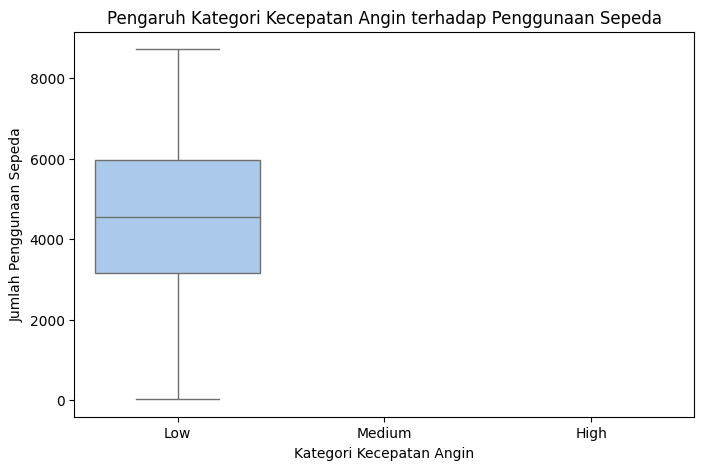

In [98]:
# Membuat boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='windspeed_category', y='cnt', data=day_df, palette='pastel')
plt.title('Pengaruh Kategori Kecepatan Angin terhadap Penggunaan Sepeda')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

**Insight:**
### **Pertanyaan 1: Bagaimana pengaruh musim dan situasi cuaca terhadap jumlah penggunaan sepeda?**
**1. Cuaca Cerah (Clear Weather)**

Mendominasi Penggunaan Sepeda
Pada semua musim, cuaca cerah menunjukkan rata-rata penggunaan sepeda tertinggi. Hal ini mungkin terjadi karena cuaca cerah memberikan kondisi yang nyaman dan aman bagi pengendara sepeda.

**2. Penggunaan Terendah pada Musim Dingin dan Cuaca Ekstrem**

Musim dingin (Winter) menunjukkan angka penggunaan terendah di semua kategori situasi cuaca. Kombinasi Winter dengan Light Snow/Rain dan Heavy Rain/Snow sangat tidak ideal untuk aktivitas bersepeda, kemungkinan karena suhu rendah dan kondisi jalan yang licin.

**3. Musim Panas dan Musim Semi Mendorong Aktivitas Bersepeda**

Musim panas (Summer) dan musim semi (Spring) mencatat rata-rata penggunaan sepeda yang tinggi, terutama pada kondisi cuaca cerah. Cuaca hangat dan kondisi jalan yang mendukung selama musim-musim ini memungkinkan lebih banyak orang untuk bersepeda.

**4. Dampak Cuaca Kabut (Mist)**

Dalam semua musim, cuaca kabut (Mist) mencatat angka penggunaan sepeda yang lebih rendah dibandingkan cuaca cerah, tetapi masih lebih tinggi daripada kondisi hujan ringan atau salju.

**5. Musim Gugur (Fall) Sebagai Musim dengan Aktivitas Sedang**

Musim gugur menunjukkan tingkat aktivitas sedang dibandingkan musim lainnya, dengan kecenderungan lebih tinggi pada cuaca cerah. Faktor cuaca dan suhu mungkin lebih variabel selama musim ini.


### **Pertanyaan 2: Bagaimana kecepatan angin memengaruhi tingkat penggunaan sepeda?**
**1. Pengaruh Kecepatan Angin Rendah**

Penggunaan sepeda cenderung lebih tinggi saat kecepatan angin berada di level rendah. Kondisi ini memberikan kenyamanan bagi pengendara, terutama untuk bersepeda santai atau perjalanan harian. Histogram menunjukkan bahwa sebagian besar data distribusi kecepatan angin berada di kategori rendah, yang dapat menjelaskan mengapa tingkat penggunaan sepeda lebih stabil pada kondisi ini.

**2. Penurunan Penggunaan pada Kecepatan Angin Tinggi**

Scatter plot dan garis tren menunjukkan adanya hubungan negatif antara kecepatan angin dan jumlah penggunaan sepeda. Ketika angin bertiup dengan kecepatan tinggi, pengguna sepeda cenderung berkurang secara signifikan. Hal ini mungkin disebabkan oleh kesulitan fisik yang dihadapi pengendara dalam melawan angin.

**3. Kecepatan Angin Sedang Sebagai Zona Aman**

Pengelompokan kecepatan angin (kategori rendah, sedang, tinggi) melalui boxplot menunjukkan bahwa pada kategori kecepatan sedang, tingkat penggunaan sepeda masih cukup baik meskipun sedikit lebih rendah dibandingkan kecepatan rendah. Hal ini menunjukkan bahwa pengguna sepeda masih nyaman dalam kondisi angin sedang.

**4. Korelasi dengan Aktivitas Outdoor**

Secara umum, hubungan antara windspeed dan cnt mencerminkan dampak langsung dari kenyamanan aktivitas luar ruangan. Angin kencang dapat dianggap sebagai penghalang utama bagi pengendara sepeda. Hubungan linier dari scatter plot mendukung bahwa kecepatan angin merupakan variabel lingkungan yang signifikan memengaruhi keputusan untuk menggunakan sepeda.

**5. Insight untuk Perencanaan**

- Transportasi Kota: Peningkatan fasilitas seperti jalur sepeda terlindung dapat mengurangi dampak angin terhadap pengalaman bersepeda.
- Waktu Operasional: Layanan berbasis sepeda (seperti persewaan) dapat memaksimalkan tingkat penggunaannya pada hari-hari dengan kecepatan angin rendah hingga sedang.
- Kampanye dan Edukasi: Edukasi masyarakat tentang cara mempersiapkan diri menghadapi angin saat bersepeda (seperti penggunaan pakaian khusus atau perlengkapan pelindung angin) dapat membantu mendorong aktivitas bersepeda meski dalam kondisi angin sedang.

## Analisis Lanjutan (Opsional)

## Conclusion

### **- Conclution pertanyaan 1**
1. Cuaca Cerah (Clear Weather): Cuaca cerah adalah kondisi yang paling ideal untuk bersepeda, terlepas dari musim. Ini memberikan pengalaman berkendara yang nyaman dan aman bagi pengguna.
2. Musim Dingin dan Cuaca Ekstrem: Musim dingin, terutama jika dikombinasikan dengan cuaca ekstrem seperti hujan ringan/salju (Light Snow/Rain) atau hujan deras/salju tebal (Heavy Rain/Snow), menunjukkan penurunan signifikan dalam penggunaan sepeda. Faktor suhu yang rendah dan jalan yang licin menjadi alasan utama.
3. Musim Panas dan Musim Semi: Musim panas dan musim semi adalah musim yang paling mendorong aktivitas bersepeda. Suhu yang hangat dan kondisi jalan yang baik selama periode ini menciptakan waktu yang ideal untuk bersepeda, terutama pada cuaca cerah.
4. Cuaca Kabut (Mist): Meskipun tidak seoptimal cuaca cerah, cuaca kabut masih memungkinkan jumlah penggunaan sepeda yang lebih tinggi dibandingkan kondisi hujan atau salju, tetapi tetap lebih rendah dibandingkan cuaca cerah.
5. Musim Gugur (Fall): Musim gugur merupakan musim transisi dengan aktivitas bersepeda yang sedang. Faktor variabilitas suhu dan kondisi cuaca memberikan kontribusi pada pola penggunaan yang moderat.

**Rekomendasi:**
1. Perencanaan Transportasi: Strategi pengelolaan transportasi berbasis sepeda harus memperhatikan musim dan cuaca, seperti memperbanyak jalur sepeda terlindung untuk kondisi ekstrem.
2. Promosi Musim Tertentu: Kampanye untuk mendorong penggunaan sepeda dapat difokuskan pada musim semi dan musim panas, terutama pada hari-hari cerah.
3. Dukungan Infrastruktur: Penyediaan fasilitas yang mendukung, seperti tempat berlindung saat hujan atau salju, dapat membantu meningkatkan jumlah pengguna sepeda pada kondisi cuaca yang kurang ideal.

### **- Conclution pertanyaan 2**
1. Kecepatan Angin Rendah Meningkatkan Kenyamanan: Penggunaan sepeda lebih tinggi pada tingkat kecepatan angin rendah, memberikan pengalaman yang nyaman untuk perjalanan santai atau aktivitas sehari-hari.
2. Kecepatan Angin Tinggi Mengurangi Penggunaan: Saat angin bertiup kencang, terjadi penurunan signifikan dalam penggunaan sepeda. Tantangan fisik yang dihadapi pengendara dalam melawan angin adalah alasan utama di balik tren ini.
3. Kecepatan Angin Sedang Masih Dapat Diterima: Pada tingkat kecepatan angin sedang, jumlah pengguna sepeda tetap cukup baik, menunjukkan bahwa pengendara masih merasa nyaman meskipun angin lebih kuat dibandingkan kondisi rendah.
4. Dampak Langsung pada Aktivitas Luar Ruangan: Kecepatan angin menjadi faktor lingkungan penting yang memengaruhi kenyamanan aktivitas luar ruangan, termasuk bersepeda. Hubungan negatif antara kecepatan angin dan penggunaan sepeda menunjukkan bahwa peningkatan angin kencang dapat membatasi jumlah pengguna.

**Rekomendasi:**
1. Peningkatan Infrastruktur: Jalur sepeda yang terlindung atau berada di area dengan penghalang angin (seperti pohon atau dinding pelindung) dapat membantu memitigasi pengaruh angin kencang.
2. Penyesuaian Operasional: Optimalisasi penggunaan layanan berbasis sepeda (seperti penyewaan sepeda) sebaiknya difokuskan pada hari-hari dengan kecepatan angin rendah hingga sedang.
3. Kampanye Kesadaran: Edukasi masyarakat tentang persiapan menghadapi kondisi angin, termasuk penggunaan pakaian pelindung atau teknik bersepeda yang efektif, dapat meningkatkan kenyamanan pengguna.